In [221]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nrclex import NRCLex
import nltk
from profanity_check import predict, predict_prob
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

In [171]:
songs = pd.read_csv('../data/songs_after_round_2_cleaning.csv')

In [172]:
from nrclex import NRCLex
text = 'hate'
emotion = NRCLex(text)
print(emotion.raw_emotion_scores)

{'anger': 1, 'disgust': 1, 'fear': 1, 'negative': 1, 'sadness': 1}


# Write a Function That Returns Emotion by Song

In [173]:
def get_emotion(row):
    text_object = NRCLex(row['cleaned_lyrics'])
    emotion_dict = text_object.affect_frequencies
    return emotion_dict

In [174]:
songs['emotion_dict'] = songs.apply(get_emotion, axis = 1)

In [175]:
def get_fear(row):
    return row['emotion_dict']['fear']

def get_anger(row):
    return row['emotion_dict']['anger']

def get_trust(row):
    return row['emotion_dict']['trust']

def get_surprise(row):
    return row['emotion_dict']['surprise']

def get_negative(row):
    return row['emotion_dict']['negative']

def get_sadness(row):
    return row['emotion_dict']['sadness']

def get_disgust(row):
    return row['emotion_dict']['disgust']

def get_joy(row):
    return row['emotion_dict']['joy']

In [176]:
songs['fear'] = songs.apply(get_fear, axis = 1)
songs['anger'] = songs.apply(get_anger, axis = 1)
songs['trust'] = songs.apply(get_trust, axis = 1)
songs['surprise'] = songs.apply(get_surprise, axis = 1)
songs['negative'] = songs.apply(get_negative, axis = 1)
songs['sadness'] = songs.apply(get_sadness, axis = 1)
songs['disgust'] = songs.apply(get_disgust, axis = 1)
songs['joy'] = songs.apply(get_joy, axis = 1)

In [177]:
# deleting unneeded columns
songs = songs.drop(columns=['emotion_dict'])

In [178]:
songs.head()

,song_name,artist,lyrics,descriptionsong,accepted_annotations,contributors,pageviews,descriptionartist,images_url,followers_count,gender,birth_year,birth_decade,cleaned_lyrics,fear,anger,trust,surprise,negative,sadness,disgust,joy
0,​​rockstar,Post Malone,"[Intro: Post Malone] Hahahahaha Tank God Ayy, ...","On “rockstar,” Post Malone compares his habits...",18.0,440.0,6884752.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,[intro: post malone] hahahahaha tank god ayy a...,0.084615,0.153846,0.138462,0.030769,0.130769,0.046154,0.046154,0.115385
1,White Iverson,Post Malone,[Intro] Double OT I'm a new three [Chorus] Sau...,"Virtually unknown before this track, Post Malo...",31.0,222.0,4145011.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,[intro] double ot im a new three [chorus] sauc...,0.139665,0.106145,0.072626,0.078212,0.111732,0.089385,0.027933,0.083799
2,Congratulations,Post Malone,"[Intro: Post Malone] Mm-mmm Yeah, yeah Mm-mmm ...","On “Congratulations,“ Post Malone and Quavo ce...",13.0,222.0,3634846.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,[intro: post malone] mm_mmm mm_mmm yeah (hey) ...,0.052632,0.096491,0.061404,0.078947,0.087719,0.026316,0.052632,0.140351
3,Psycho,Post Malone,"[Chorus: Post Malone] Damn, my AP goin' psycho...",“Psycho” is the third single from Post Malone’...,21.0,230.0,3082328.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,[chorus: post malone] damn my ap going psycho ...,0.079646,0.150442,0.141593,0.017699,0.176991,0.079646,0.123894,0.070796
4,I Fall Apart,Post Malone,"[Intro] Ooh, I fall apart Ooh, yeah, mmm, yeah...","On “I Fall Apart,” Post reminisces about a hea...",7.0,126.0,2640796.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,[intro] ooh i fall apart ooh yeah mmm yeah [v...,0.069767,0.093023,0.058140,0.058140,0.232558,0.139535,0.093023,0.034884


In [179]:
songs.columns

Index(['song_name', 'artist', 'lyrics', 'descriptionsong',
       'accepted_annotations', 'contributors', 'pageviews',
       'descriptionartist', 'images_url', 'followers_count', 'gender',
       'birth_year', 'birth_decade', 'cleaned_lyrics', 'fear', 'anger',
       'trust', 'surprise', 'negative', 'sadness', 'disgust', 'joy'],
      dtype='object')

# Get Average Emotion by Artist

In [183]:
by_artist = pd.DataFrame(songs.groupby('artist').mean()).reset_index()
by_artist = by_artist[['artist','fear', 'anger', 'trust', 'surprise', 'negative','sadness', 'disgust', 'joy']]
by_artist.head(100)

,artist,fear,anger,trust,surprise,negative,sadness,disgust,joy
0,21 Savage,0.114610,0.123018,0.093503,0.058702,0.194060,0.070610,0.074014,0.073955
1,24kGoldn,0.096347,0.109339,0.069825,0.041482,0.178445,0.098496,0.054829,0.098415
2,A Boogie wit da Hoodie,0.100514,0.109914,0.068673,0.041239,0.176528,0.087168,0.087480,0.094522
3,AJR,0.085848,0.069828,0.087860,0.074756,0.153095,0.078417,0.070540,0.100233
4,Ariana Grande,0.052359,0.065874,0.101335,0.049736,0.151638,0.074231,0.049355,0.126644
5,Arizona Zervas,0.112745,0.088592,0.071455,0.045240,0.179448,0.082953,0.058870,0.077361
6,Ashe,0.078486,0.075915,0.090884,0.043112,0.127660,0.094131,0.055278,0.126568
7,Ava Max,0.113298,0.062670,0.072930,0.040975,0.172911,0.116207,0.059358,0.100688
8,Billie Eilish,0.119657,0.083803,0.053470,0.030602,0.185866,0.145709,0.077297,0.078283
9,Blake Shelton,0.071919,0.078543,0.081554,0.037363,0.155440,0.067964,0.053982,0.120477


In [184]:
# plot emotion by artist

In [202]:
df = by_artist.sort_values(by = 'sadness').tail(4).reset_index(drop=True)

In [203]:
df

,artist,fear,anger,trust,surprise,negative,sadness,disgust,joy
0,​girl in red,0.117797,0.073861,0.065342,0.042971,0.167830,0.124235,0.057187,0.081663
1,FINNEAS,0.102451,0.066489,0.065877,0.046095,0.189603,0.125832,0.064743,0.081441
2,XXXTENTACION,0.123193,0.111906,0.057573,0.025355,0.190537,0.135236,0.086948,0.078824
3,Billie Eilish,0.119657,0.083803,0.053470,0.030602,0.185866,0.145709,0.077297,0.078283


In [217]:
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.05,.10,.15,.20], ['.05','.10','.15','.20'], color="grey", size=10)
    plt.ylim(0,.2)

    # Ind1
    values=df.loc[row].drop('artist').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.tight_layout(pad=4.0)

    # Add a title
    plt.title(title, size=11, color=color, y=1.12)


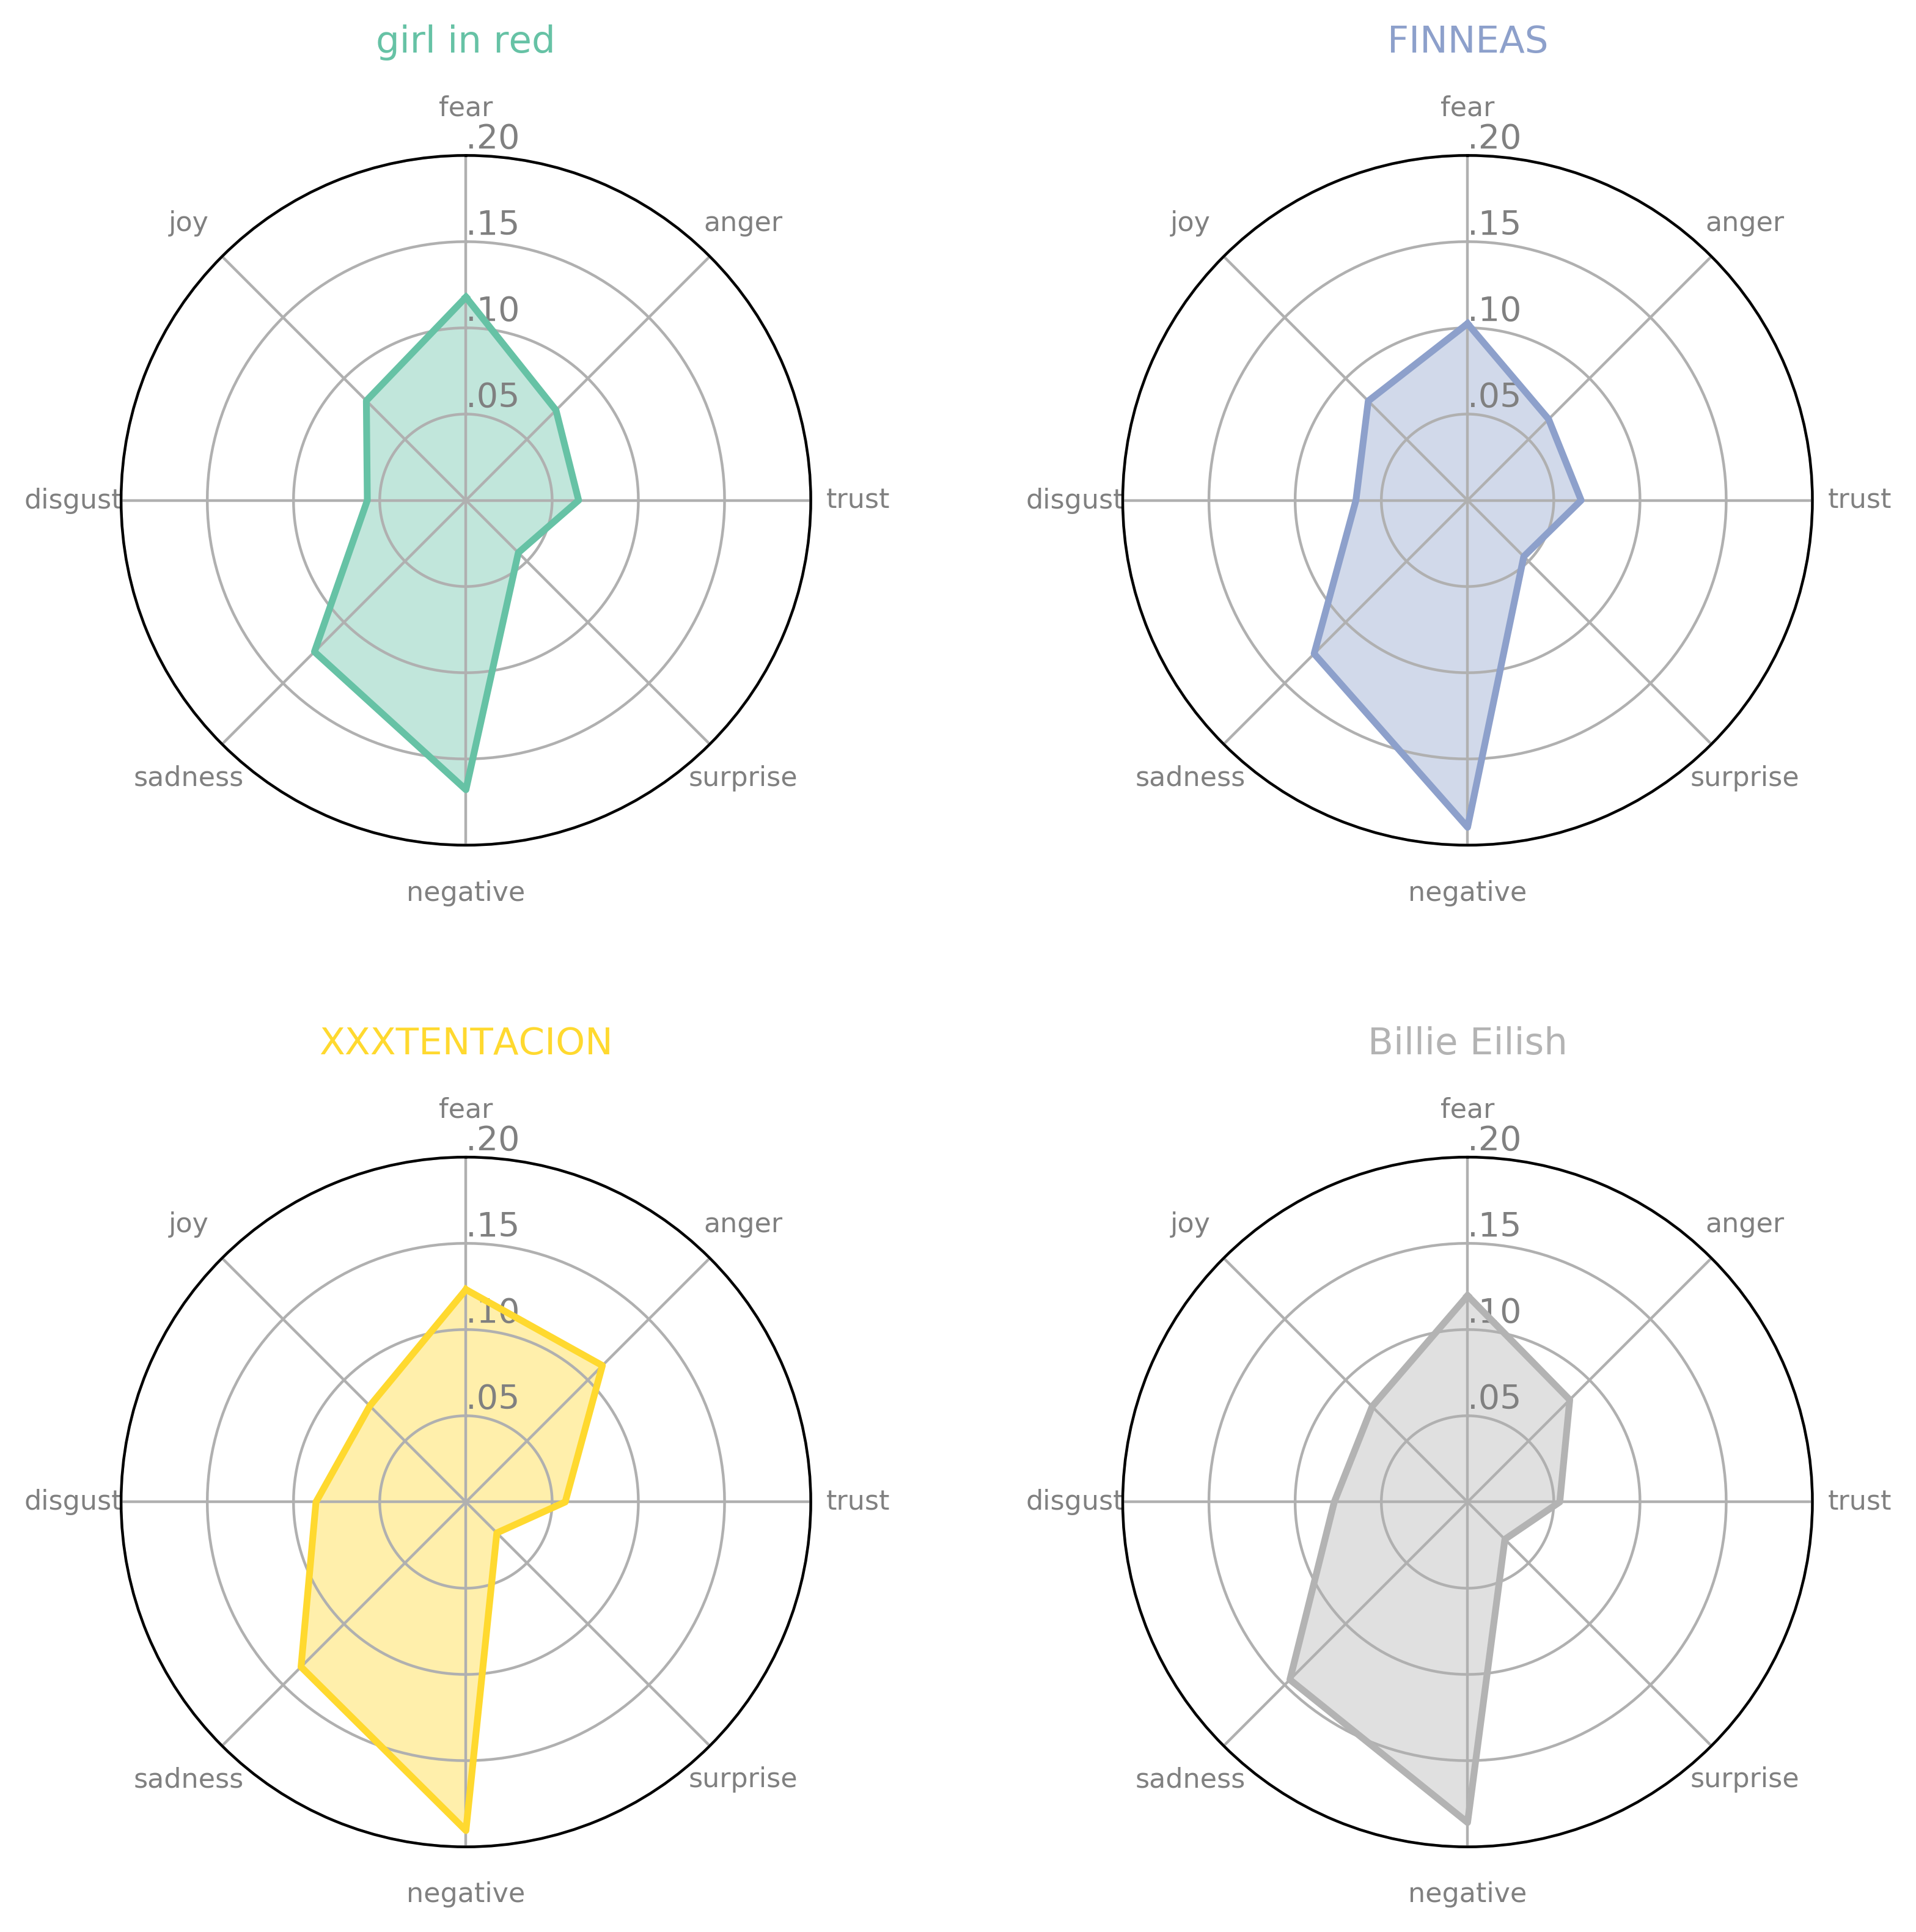

In [225]:
# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

# Get Emotion by Gender

# Get Emotion by Age